# Chatbot v2
This notebook makes our chatbot even more interactive by incorporating OpenAI's language models.


### API Key
Before we can access an LLM, an API key is needed for authentication.  This is set up in the shell's configuration file as an environment variable and is not displayed here for security reasons.

The OpenAI client uses the key to establish the LLM's access and handles all the communication between the notebook and the server. Below we initialize the API and make sure it works.

In [2]:
from dotenv import load_dotenv
import os
from openai import OpenAI

# Create the client (initializes API connection)
load_dotenv()  # Loads .env variables
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Call the model to make sure it's working
completion = client.responses.create(
    model="gpt-4o",
    input="Write a single sentence about LLMs.",
)
print(completion.output_text)


Large Language Models (LLMs) are advanced AI systems designed to understand and generate human-like text across various contexts.


## Building an Interactive Chatbot with Streaming
In the code below(chatbot v1), there is a function highlighted which generated the response the chatbot could provide the user. It was made, using the `st.write_stream()` method, to the user a chunk at a time similar to how a typewriter works. 

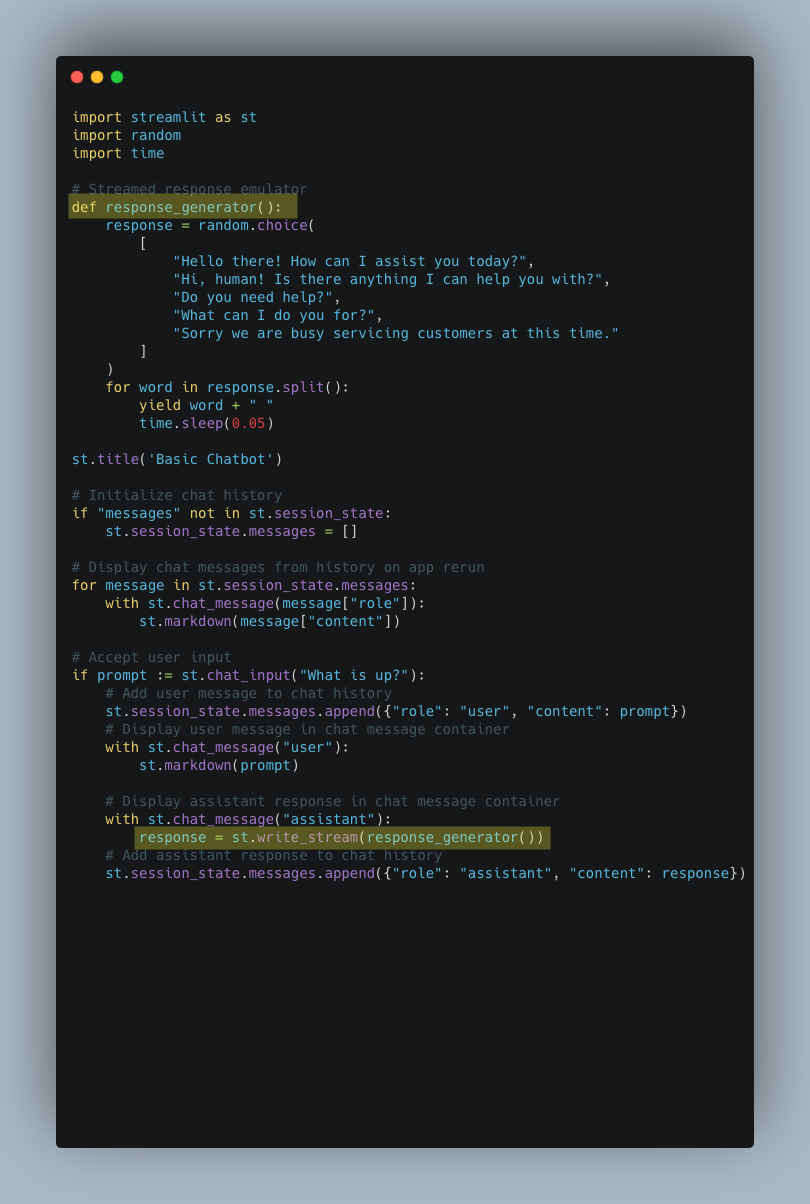

## Adding LLMs to our Chatbot
Instead of passing a generator to the functions parameter, we pass an OpenAI stream. After the user enters their input, the chatbot passes it to the LLM through the client. The response is streamed back as it is created. There's no need to artificially delay the response; it will be created a chunk at a time. 

In [3]:
%%writefile v2-chatbot-LLM.py

from openai import OpenAI
import streamlit as st
import os

st.title('Chatbot-LLM')

# Set OpenAI API key from environment
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Set a default model
if "openai_model" not in st.session_state:
    st.session_state["openai_model"] = "gpt-3.5-turbo"

# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []

# Show previous messages from history
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

# Accept user input
if prompt := st.chat_input("Waiting for your command..."):
    # Add user message to chat history
    st.session_state.messages.append({"role": "user", "content": prompt})
    # Display user message in chat container
    with st.chat_message("user"):
        st.markdown(prompt)

    # Response in chat message container
    with st.chat_message("assistant"):
            stream = client.chat.completions.create(
            model = st.session_state["openai_model"],
            messages=[
                {"role": m["role"], "content": m["content"]}
                for m in st.session_state.messages
            ],
            stream=True,
        )
        response = st.write_stream(stream)
    # Add assistant response to chat history
    st.session_state.messages.append({"role": "assistant", "content": response})

Writing v2-chatbot-LLM.py
